### Part A

In [103]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# Approach

### Problem definition

Using the CSV data of 21 numeric column values predict the  class value TRUE or FALSE(binary classification).

### Data

The Sample data having 21 Numeric column values and one boolean values

### EDA

Perform the basic EDA for identify the class imbalance and outliers

### Data Preprocessing

Remove the Null values by filling the mean value

### Modeling and comparison

Select the classification model available in scikit lern model map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Hyperparameter tuning

We are using 3 approaches for hyperparamter tuning

- byhand
- RandomizedSearchCV
- GridSearchCV

### Evaluation

We will apply differnt evaluation metrix available for classfication model

### Predict the class values from test data using the best model

Finaly we fill use our best model to predict the class values from test data

### Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [104]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [105]:
df = pd.read_csv("P1_Data.csv")
df.shape # (rows, columns)

(1000, 22)

## Data Exploration (exploratory data analysis or EDA)

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?
6. Check for any class imbalance

In [106]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


In [107]:
df.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
995,0.6828,1,-5766.04,-11.8536,-4.8666,1,7.93800,-11.172,-8.014,3.2704,...,7.489000,-11922.06,23569.44,-1.4,103930.52,2.8358,1551.190,-5559.68,NaN,False
996,1.2240,1,-4424.64,-16.6770,-8.3130,1,4.91960,-15.150,-12.676,3.8161,...,7.069000,-11328.69,24196.14,-0.4,103922.40,4.0364,1519.940,-4089.48,NaN,False
997,0.9912,1,-5566.64,-10.9698,-8.3640,0,3.99842,-15.426,-17.442,3.7323,...,5.875600,-12229.26,18449.64,-1.4,103872.12,3.8368,1509.360,-3772.28,NaN,True
998,0.6697,1,-4630.96,-11.4516,-4.9707,0,8.61600,-19.522,-1.698,3.2263,...,5.761497,-10846.56,23102.40,-1.4,103837.70,4.4460,1549.200,-3947.68,-40.11,False
999,0.8394,1,-5488.44,-11.9115,-5.1072,0,7.04600,-12.875,-13.292,3.3053,...,6.069900,-11860.29,23621.04,-0.4,103885.30,3.4320,1522.223,-4645.08,NaN,True


In [108]:
# Let's find out how many of each class there
df["Class"].value_counts()

True     506
False    494
Name: Class, dtype: int64

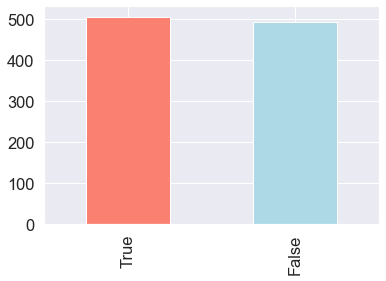

In [109]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   int64  
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [111]:
# Are there any missing values?
df.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [112]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,1.067873,0.507000,-5361.832102,-13.230040,-6.313792,0.481000,5.890532,-14.141708,-20.424599,3.938608,...,-3.621917,6.244264,-11630.293754,24105.732399,-0.929000,103949.541430,3.988717,1451.053607,-3933.396979,-44.650560
std,0.902763,0.500201,1494.941683,2.560369,1.842535,0.499889,1.799838,4.861641,20.571395,0.901204,...,1.805553,0.671938,1534.747192,3111.533532,0.499408,3376.459607,1.739357,246.538717,1405.781722,3.188244
min,0.112200,0.000000,-15323.440000,-23.889000,-14.613000,0.000000,3.942760,-29.850000,-163.680000,3.002990,...,-10.616000,5.760001,-23402.760000,10433.640000,-1.400000,96416.660000,2.144440,-139.080000,-11393.480000,-54.960000
25%,0.396475,0.000000,-5523.540000,-14.325000,-7.453500,0.000000,4.487150,-17.209750,-26.025000,3.261825,...,-4.447000,5.803685,-12032.460000,22905.300000,-1.400000,103814.590000,2.686650,1437.582500,-4495.635000,-46.875000
50%,0.783700,1.000000,-4984.540000,-12.416250,-5.912250,0.000000,5.309600,-14.180050,-14.284000,3.657250,...,-3.064500,5.993600,-11597.425500,23486.040000,-1.400000,103852.225000,3.478100,1504.890000,-4210.100000,-44.505000
75%,1.464250,1.000000,-4731.133500,-11.337000,-4.853100,1.000000,6.856500,-11.066750,-6.504000,4.307000,...,-2.234900,6.399525,-11223.660000,24446.265000,-0.400000,103890.880000,4.759000,1537.961250,-3746.730000,-42.450000
max,4.602000,1.000000,2722.560000,-10.533870,-3.991776,1.000000,12.744000,5.030000,-0.124656,7.555000,...,-1.644240,11.578000,-1190.760000,47423.640000,-0.400000,209390.660000,11.170000,3091.920000,5696.520000,-34.530000


## Correlation matrix between the fields

(22.5, -0.5)

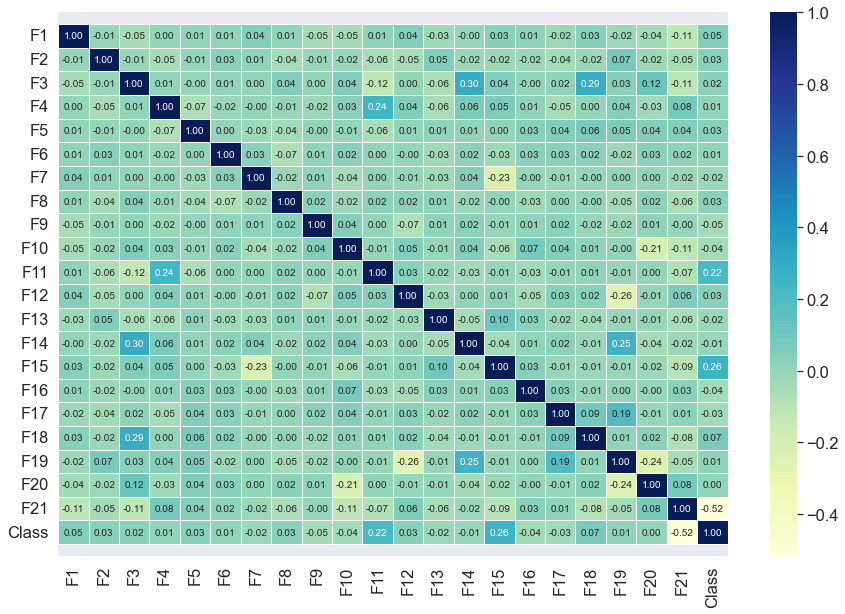

In [113]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Getting our data ready to be used with machine learning

Three main things we have to do:

1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [114]:
# Fill the "F21" column with mean value
df["F21"].fillna(df["F21"].mean(), inplace=True)
df.isna().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
Class    0
dtype: int64

In [115]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58000,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96000,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,-44.65056,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,-44.65056,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93000,True


## Modelling

In [116]:
# Split data into X and y
X = df.drop("Class", axis=1)

y = df["Class"]

In [117]:
X,y

(         F1  F2       F3       F4        F5  F6       F7       F8      F9  \
 0    1.6430   0 -4894.24 -13.0281 -4.793400   0  5.12700 -17.1100 -63.340   
 1    0.5310   0 -5085.44 -16.2210 -3.991776   0  4.62560  -4.5800 -10.314   
 2    0.2640   0 -7021.44 -11.7591 -6.161700   0  4.36280 -14.7118  -6.806   
 3    0.3196   1 -4648.76 -11.8110 -4.217700   0  8.93800  -7.5360  -4.670   
 4    4.0800   0 -4877.20 -11.2635 -8.061000   1  6.28000 -14.5805 -45.920   
 ..      ...  ..      ...      ...       ...  ..      ...      ...     ...   
 995  0.6828   1 -5766.04 -11.8536 -4.866600   1  7.93800 -11.1720  -8.014   
 996  1.2240   1 -4424.64 -16.6770 -8.313000   1  4.91960 -15.1500 -12.676   
 997  0.9912   1 -5566.64 -10.9698 -8.364000   0  3.99842 -15.4260 -17.442   
 998  0.6697   1 -4630.96 -11.4516 -4.970700   0  8.61600 -19.5220  -1.698   
 999  0.8394   1 -5488.44 -11.9115 -5.107200   0  7.04600 -12.8750 -13.292   
 
          F10  ...      F12       F13       F14       F15  F16

In [118]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [119]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## We're going to try 3 different machine learning models:

- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest Classifier (Decision Tree)


In [120]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVC":svm.SVC(),
          "Linear SVC":LinearSVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [121]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Users/sujithchennat/Desktop/KTPML/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sujithchennat/Desktop/KTPML/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 0.73,
 'KNN': 0.65,
 'Random Forest': 0.865,
 'SVC': 0.455,
 'Linear SVC': 0.575}

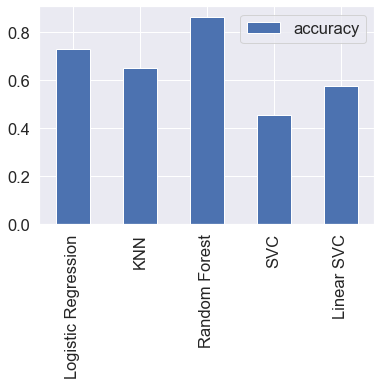

In [122]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Trying Different Classification Model Evaluation Metrics/Techniques:
Let's look at the following:

- Hypyterparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [123]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 70.00%


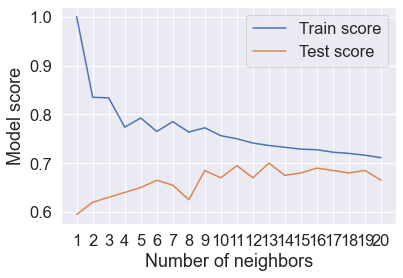

In [124]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

- LogisticRegression()

In [125]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [126]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [127]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [128]:
# Evaluate the randomized search on LogisticRegression
rs_log_reg.score(X_test, y_test)

0.745

## Hyperparameter tuning with RandomizedSearchCV

- RandomForestClassifier()

In [129]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [130]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [131]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.88

## Hyperparamter Tuning with GridSearchCV

- LogisticRegression

In [132]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [133]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [134]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.735

## Hyperparamter Tuning with GridSearchCV

- RandomForest


In [135]:
np.random.seed(42)


# Different hyperparameters for our RandomForest model
Rand_forest_grid = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}


# Setup grid hyperparameter search for RandomForest
gs_Rand_forest = GridSearchCV(RandomForestClassifier(),
                          param_grid=Rand_forest_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_Rand_forest.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [136]:
# Check the best hyperparmaters
gs_Rand_forest.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [137]:
# Evaluate the grid search Random Foresr model
gs_Rand_forest.score(X_test, y_test)

0.865

## Evaluting our tuned machine learning classifier, beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

In [138]:
# Make predictions with tuned model
y_preds = gs_Rand_forest.predict(X_test)
y_preds

array([ True,  True, False, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,

/Users/sujithchennat/Desktop/KTPML/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


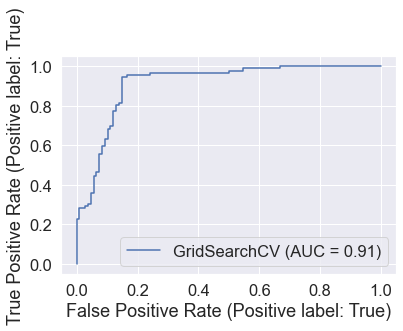

In [139]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_Rand_forest, X_test, y_test)

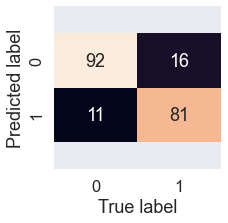

In [140]:
# Confusion matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [141]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.89      0.85      0.87       108
        True       0.84      0.88      0.86        92

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [142]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [143]:
# Cross-validated accuracy
cv_acc = cross_val_score(rs_rf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


array([0.86 , 0.9  , 0.86 , 0.825, 0.82 ])

In [144]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8530000000000001

In [145]:
# Cross-validated precision
cv_precision = cross_val_score(rs_rf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8463473784816088

In [146]:
# Cross-validated recall
cv_recall = cross_val_score(rs_rf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8557173364395263

In [147]:
# Cross-validated f1-score
cv_f1 = cross_val_score(rs_rf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8654750950150969

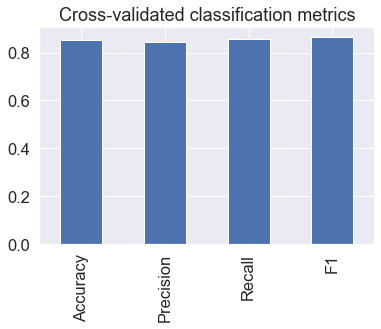

In [148]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Part B

In [149]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('P1_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# TO fix the "Input contain NAN values" error
test_data["F21"].fillna(test_data["F21"].mean(), inplace=True)
test_data.isna().sum()

# we are using the model RandomForest RandmizedsearchCV which result 88% accuracy
predicted = rs_rf.predict(test_data)
predicted

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('P1_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('P1_Test.csv').iloc[:,:-1].equals(pd.read_csv('P1_Test_Predictions.csv').iloc[:,:-1])